# ML 02 - Gradient Descent

## Atmospheric CO<sub>2</sub> levels

Download the data file **``co2_mm_mlo.txt``** from <br />
https://climate.nasa.gov/vital-signs/carbon-dioxide/ <br \>
(Same data set as in ML 01 - Logistic Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 

In [4]:
df = pd.read_table('co2_mm_mlo.txt', skiprows=72, delim_whitespace=True,header=None)

In [5]:
df[:5]

,0,1,2,3,4,5,6
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


In [6]:
x = np.array(df[[2]])
Y = np.array(df[[4]])

We've seen that the 2nd order polinomial $ y = w_0 + w_1 x + w_2 x^2 $, with parameters

$w_0 = 4.75\times 10^4$,

$w_1 = -49.0$ , and

$w_2 = 1.27 \times 10^{-2}$,

represents a good fit for this data set.

Here we want to solve this optimization problem again, using a **gradient descent** numerical algorithm.

## Gradient Descent

$
\textrm{Gradient:} 
\quad
\nabla_{\theta}J = \frac{1}{m}X^T (X\theta-Y)
$

$
\textrm{Gradient descent:} 
\quad
\theta = \theta -\epsilon\ \nabla_{\theta}J \quad \textrm{until convergence to } \theta^*
$

In [7]:
def gradient_linear(X,Y,theta):
    return np.dot(X.T,(np.dot(X,theta)-Y))/len(X)

This algorithm is not goin to work, unless you normalize the features first.

### Feature Normalization

$$
\chi_0 = 1
\quad , \quad
\chi_1 = \frac{x-\langle x\rangle}{\sigma_x}
\quad , \quad
\chi_2 = \frac{x^2-\langle x^2\rangle}{\sigma_{x^2}}
$$

Therefore,

\begin{eqnarray}
y  & = & w_0 + w_1 x + w_2 x^2  \\
   & = & \omega_0 + \omega_1 \chi_1 + \omega_2 \chi_2
\end{eqnarray}

With 

\begin{eqnarray}
\omega_0 & = & w_0 + \langle x\rangle w_1 + \langle x^2\rangle w_2   \\[1mm]
\omega_1 & = & \sigma_x w_1\\[1mm]
\omega_2 & = & \sigma_x^2 w_2
\end{eqnarray}

or

\begin{eqnarray}
w_0 & = & \frac{\omega_1 }{ \sigma_x }   \\[2mm]
w_1 & = & \frac{\omega_2 }{ \sigma_{x^2} } \\[2mm]
w_2 & = & \omega_0 -\frac{\langle x\rangle}{\sigma_x} \omega_1 -\frac{\langle x^2\rangle}{\sigma_{x^2}} \omega_2
\end{eqnarray}


In [8]:
chi0 = x**0;
chi1 = (x-np.mean(x))/np.std(x);
chi2 = (x**2-np.mean(x**2))/np.std(x**2);
X = np.hstack((chi0 , chi1 , chi2))

In [10]:
R = np.array([[1.,-np.mean(x**1)/np.std(x**1),-np.mean(x**2)/np.std(x**2)],
[0.,1./np.std(x**1),0.],
[0.,0.,1./np.std(x**2)]])

print(R)

[[  1.00000000e+00  -1.13852623e+02  -5.69302641e+01]
 [  0.00000000e+00   5.72579305e-02   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.43977592e-05]]


In [11]:
theta = np.zeros((3,1))

In [12]:
epsilon = .6

In [13]:
for i in range(0, int(1e+6)):
    theta = theta - epsilon*gradient_linear(X,Y,theta)
print theta

[[ 353.56853994]
 [-847.48543138]
 [ 874.55551701]]


In [14]:
np.dot(R,theta)

array([[  4.70533316e+04],
       [ -4.85252619e+01],
       [  1.25916398e-02]])

### Cost Function Visualization 

In [15]:
# Objective function
def objective_function_linear(X,Y,theta):
    return (X.dot(theta)-Y).T.dot(X.dot(theta)-Y)[0][0]/2./len(Y)

In [39]:
theta = np.zeros((3,1))
epsilon = 1.

step=list()
objective=list()

for i in range(0, 1000):
    for j in range(0,1000):
        theta = theta - epsilon*gradient_linear(X,Y,theta)
    step.append(i)
    objective.append(objective_function_linear(X,Y,theta))

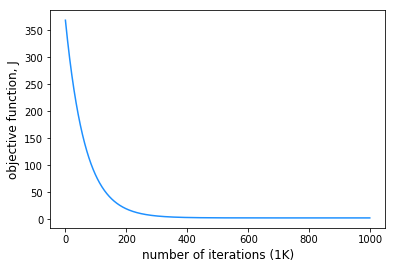

In [40]:
plt.plot(step, objective,color='dodgerblue');
plt.xlabel('number of iterations (1K)',size=12);
plt.ylabel('objective function, J',size=12);

In [41]:
print 'w0 = ' + '{:03.0f}'.format(np.dot(R,theta)[0][0])
print 'w1 = ' + '{:03.1f}'.format(np.dot(R,theta)[1][0])
print 'w2 = ' + '{:03.4f}'.format(np.dot(R,theta)[2][0])

w0 = 47516
w1 = -49.0
w2 = 0.0127


In [42]:
cost[-1]

2.4433754731608213